In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.makedirs("../plots", exist_ok=True)

In [3]:
# Load data 
region_avg = pd.read_csv("../data/region_avg.csv")
year_cols = [str(y) for y in range(1961, 2025)]

In [4]:
# plot format
format = region_avg.melt(id_vars=["Region"], value_vars=year_cols,
                       var_name="Year", value_name="Temperature")

format["Year"] = format["Year"].astype(int)
format = format.sort_values(["Region", "Year"]).reset_index(drop=True)

### Line Chart

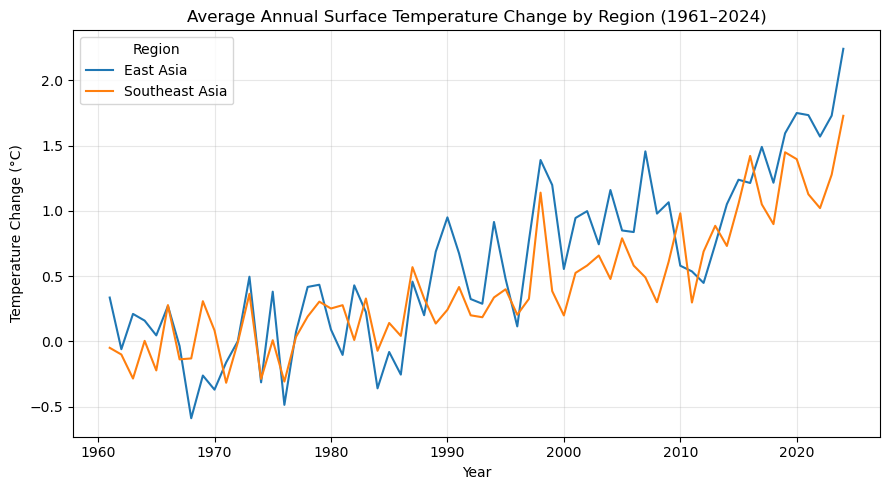

In [5]:
plt.figure(figsize=(9, 5))
for region, sub in format.groupby("Region"):
    sub.plot(x="Year", y="Temperature", ax=plt.gca(), label=region)

plt.title("Average Annual Surface Temperature Change by Region (1961–2024)")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.legend(title="Region", loc="best")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../plots/line_chart.png", dpi=200)
plt.show()

### Heat Map

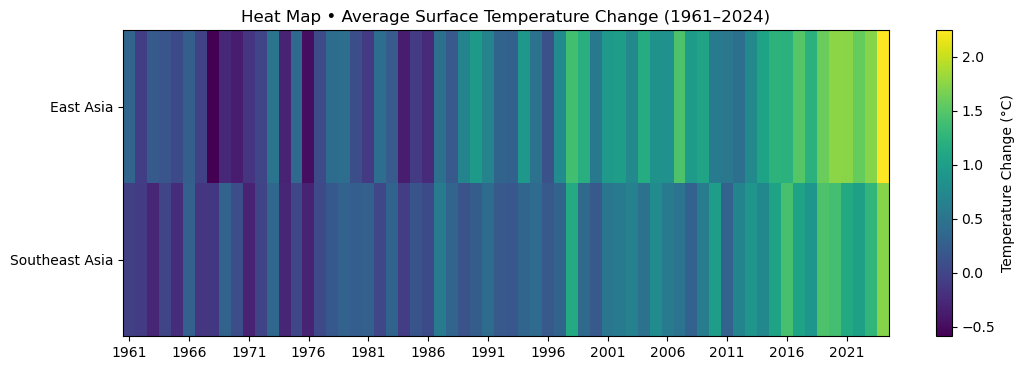

In [6]:
# Matrix in Region order
region_order = region_avg["Region"].tolist()
mat = region_avg[year_cols].to_numpy(dtype=float)

plt.figure(figsize=(11,3.8))
im = plt.imshow(mat, aspect="auto", interpolation="nearest")
plt.colorbar(im, label="Temperature Change (°C)")

# y ticks = regions
plt.yticks(ticks=np.arange(len(region_order)), labels=region_order)

# x ticks every 5 years 
xticks = list(range(1961, 2025, 5))
xtick_idx = [year_cols.index(str(y)) for y in xticks]
plt.xticks(ticks=xtick_idx, labels=xticks, rotation=0)

plt.title("Heat Map • Average Surface Temperature Change (1961–2024)")
plt.tight_layout()
plt.savefig("../plots/heatmap.png", dpi=200)
plt.show()


### Bar Chart

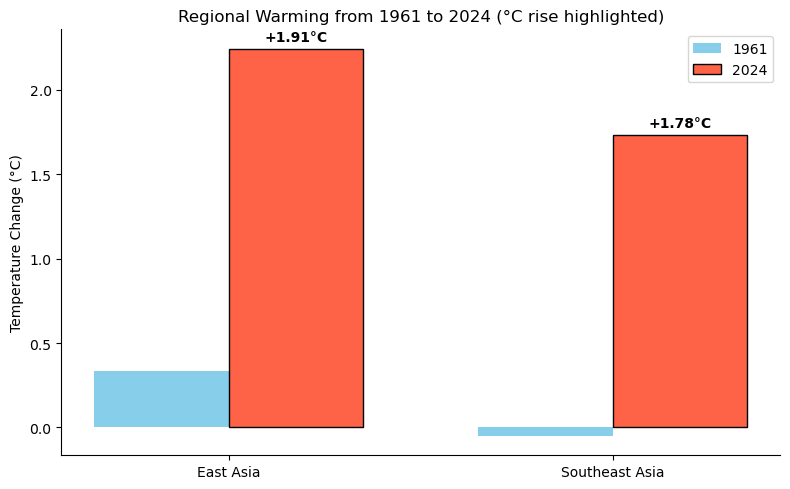

In [7]:
# extract values
start_year, end_year = "1961", "2024"

# get bars
bar_data = region_avg[["Region", start_year, end_year]].copy()
bar_data["Change"] = bar_data[end_year] - bar_data[start_year]

# setup
x = np.arange(len(bar_data))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))

# plot 1961 bars
ax.bar(x - width/2, bar_data[start_year], width, label=start_year, color="skyblue")

# plot 2024 bars
bars_2024 = ax.bar(x + width/2, bar_data[end_year], width, label=end_year,
                   color="tomato", edgecolor="black")

# lables
for rect, change in zip(bars_2024, bar_data["Change"]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.03,
            f"+{change:.2f}°C", ha="center", va="bottom", fontsize=10, fontweight="bold")

ax.set_title("Regional Warming from 1961 to 2024 (°C rise highlighted)")
ax.set_ylabel("Temperature Change (°C)")
ax.set_xticks(x)
ax.set_xticklabels(bar_data["Region"])
ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("../plots/bar_chart.png", dpi=200)
plt.show()
